In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
from sklearn.manifold import TSNE
import pandas as pd
import forgi.visual.mplotlib as fvm
from sklearn.feature_selection import VarianceThreshold
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from MGfold import mgfold, mg_dot_bracket
import ast


In [3]:
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\notebooks\fold_published.csv')
print(df['Sequence'].apply(len).max())
df['faces'] = df['faces'].apply(ast.literal_eval)
df['energy_faces'] = df['energy_faces'].apply(ast.literal_eval)
df['Sequence'].drop_duplicates()
print('Numeber of unique sequences after preprocessing removing percentile:',len(df))


83
Numeber of unique sequences after preprocessing removing percentile: 4450


In [4]:
def compute_descriptor_motzkin(input_string):
    descriptor = []
    sum = 0
    for count, char in enumerate(input_string):
        if char == '(':
            sum +=1
            descriptor.append(sum)
        elif char == ')':
            sum -=1 
            descriptor.append(sum)
        elif char == '.':
            descriptor.append(sum)      
    return descriptor  

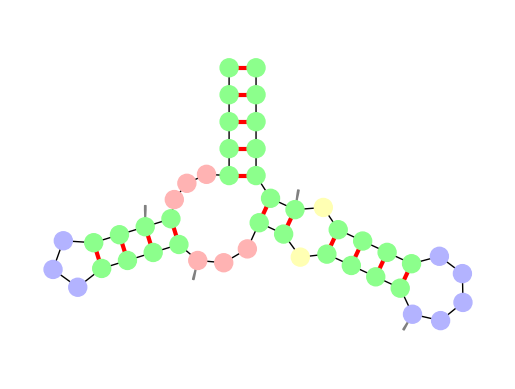

In [7]:
seq = df['Sequence'][2]
structs = mgfold(seq, l_fix=0)
d_b = mg_dot_bracket( seq, structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
fvm.plot_rna(bg, text_kwargs={"fontweight":'black', 'alpha':0}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={  'm0':None,'h1':None, 'h0':None, 's0':None})

plt.savefig('BoF_non_label.png')

In [4]:
df['Descriptor'] = df['d_b'].apply(lambda x: compute_descriptor_motzkin(x) )
# Determine the maximum length of the lists

i = 0
M_X = compute_descriptor_motzkin(df['d_b'][i])
S_X= np.array(ast.literal_eval(df['s_matrix'][i]))

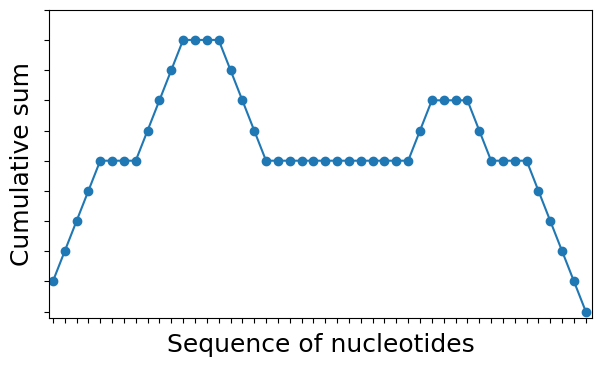

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data
plt.figure(figsize=(7, 4))  # Width = 10 inches, Height = 6 inches

plt.plot(np.arange(len(M_X)), M_X, marker='o')

# Enable grid with vertical and horizontal lines for each integer x and y value
#plt.grid(True)  # Enable the grid

# Customize the grid lines and remove ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Set vertical grid lines for each x value
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set horizontal grid lines for each integer y value

# Remove ticks and labels from both axes

ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels

# Optionally set the axis limits to match the data
ax.set_xlim(-0.3, len(M_X) - 0.5)  # Adjust x limits for visibility
ax.set_ylim(-0.2, max(M_X) + 1)  # Adjust y limits for visibility
plt.xlabel('Sequence of nucleotides',fontsize=18)
plt.ylabel('Cumulative sum',fontsize=18)
# Show the plot

# Save the plot if needed
# plt.savefig('BoF_label.png')


plt.savefig('motzkin_graph.png')


<Figure size 800x800 with 0 Axes>

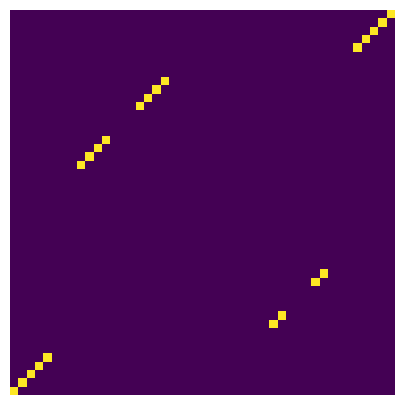

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Define the size of the matrix (n x n)
n = 10

# Create a random n x n matrix of 0s and 1s
matrix = S_X[:46][:,:46]

# Plot the matrix
plt.figure(figsize=(8, 8))
cmap = mcolors.ListedColormap(['white', 'blue'])

# Plot the matrix
plt.figure(figsize=(5, 5))
plt.imshow(matrix)

# Remove the axis
plt.axis('off')

plt.savefig('Descriptors_structural_M.png')

In [9]:
def get_part_before_colon(input_string):

    if ':' in input_string:
        return input_string.split(':')[0]
    else:
        return input_string
    
def BoF_in_df(df):    
    words = set([])
   
    for j in range(len(df['faces'])):
            words.add(((get_part_before_colon(df['faces'][j]),df['energy_faces'][j])))

    words = list(words)
    vecotr_list = []
   
    binary_array = np.zeros(len(list(words)), dtype=int)
    for j in range(len(df['faces'])):
        binary_array[words.index( (get_part_before_colon(df['faces'][j]),df['energy_faces'][j]))] += 1
    vecotr_list.append( binary_array)
    # Apply function to each row
    df['binary_array'] = vecotr_list
    X_raw= np.zeros((1, len(words)), dtype=int)
    for count, desc in enumerate(df['binary_array']):
         X_raw[count, :] =  desc
    return X_raw, words
df0 = df.loc[0]
X_raw0, words0 = BoF_in_df(df0)

C:\Users\clima\AppData\Local\Temp\ipykernel_21656\2746034088.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary_array'] = vecotr_list
C:\Users\clima\AppData\Local\Temp\ipykernel_21656\2746034088.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary_array'] = vecotr_list


In [20]:
print(words0, X_raw0)

[('HAIRPIN', 3.5), ('STACK', -1.3), ('STACK', -1.8), ('BIFURCATION', 5.3), ('STACK', -2.2), ('HAIRPIN', 1.5), ('STACK', -1.5)] [[1 1 1 1 2 1 4]]


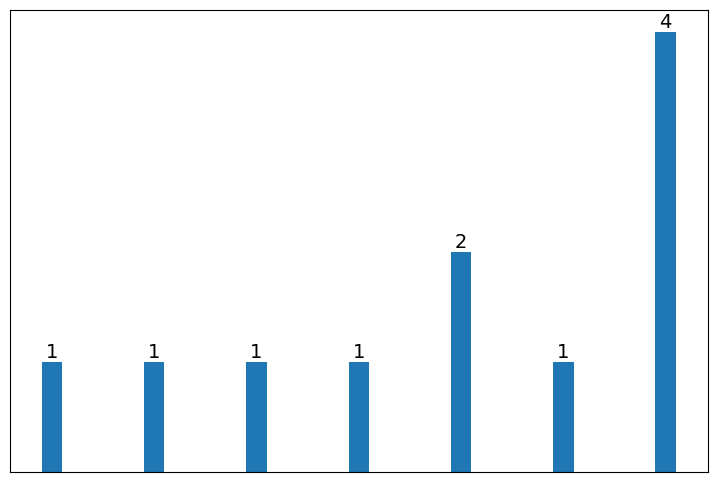

In [33]:
x = np.arange(len(X_raw0[0]))

# Plot the bar chart
plt.figure(figsize=(9 ,6))
bars = plt.bar(x, X_raw0[0],  width=0.2)
# Add the count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize = 14)
# Remove the axis
plt.xticks([])
plt.yticks([])

plt.savefig('Bog_bars.png')